In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("Korea_income_welfare.csv")
df

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874,1,
92853,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874,1,
92854,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874,1,
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,


In [4]:
job_check = pd.read_excel("job_code_translated.xlsx")
job_check = job_check[['job_code', 'job_title']]
job_check = job_check.rename(columns={"job_code": "occupation", "job_title": "job_title"})
job_check

,occupation,job_title
0,111,"Assembly members, senior public officials and ..."
1,112,senior corporate executive
2,120,Administrative and management support manager
3,131,"Research, education and legal manager"
4,132,Insurance and Finance Manager
...,...,...
144,991,"Simple workers related to agriculture, forestr..."
145,992,"Employees related to meter reading, collection..."
146,999,Other service related simple employees
147,1011,Military officer


#### Preprocessing

In [7]:
df.isna().sum()

id                    0
year                  0
wave                  0
region                0
income                0
family_member         0
gender                0
year_born             0
education_level       0
marriage              0
religion              0
occupation            0
company_size          0
reason_none_worker    0
dtype: int64

In [8]:
df.describe()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion
count,9.285700e+04,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000
mean,4.365181e+07,2011.517958,7.517958,3.691353,3441.122327,2.484304,1.296316,1952.956740,4.511895,1.679389,1.499521
std,2.619007e+07,4.011222,4.011222,2.058961,4176.324522,1.292251,0.456634,16.006065,1.669887,1.103413,0.531572
min,1.010100e+04,2005.000000,1.000000,1.000000,-232174.000000,1.000000,1.000000,1910.000000,2.000000,0.000000,1.000000
25%,2.177120e+07,2008.000000,4.000000,2.000000,1140.000000,1.000000,1.000000,1939.000000,3.000000,1.000000,1.000000
50%,4.322010e+07,2012.000000,8.000000,3.000000,2428.000000,2.000000,1.000000,1952.000000,5.000000,1.000000,1.000000
75%,6.190030e+07,2015.000000,11.000000,5.000000,4695.000000,3.000000,2.000000,1966.000000,5.000000,2.000000,2.000000
max,9.800070e+07,2018.000000,14.000000,7.000000,468209.000000,9.000000,2.000000,2002.000000,9.000000,9.000000,9.000000


In [10]:
df.nunique()

id                    10046
year                     14
wave                     14
region                    7
income                13306
family_member             9
gender                    2
year_born                90
education_level           8
marriage                  8
religion                  3
occupation              244
company_size             13
reason_none_worker       14
dtype: int64

In [12]:
df.marriage.unique()

array([2, 1, 3, 5, 4, 6, 9, 0])

In [16]:
df = df[df['marriage'].between(1,8)]
df

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874,1,
92853,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874,1,
92854,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874,1,
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,


In [19]:
df.reason_none_worker.unique()

array(['8', '10', '1', ' ', '6', '9', '4', '3', '7', '5', '11', '99', '2',
       '0'], dtype=object)

In [28]:
df[(df['occupation'] == ' ')]

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92843,97990701,2012,8,6,1591.0,2,1,1932,2,1,2,,,1
92845,97990701,2014,10,6,1612.0,2,1,1932,2,1,2,,,10
92846,97990701,2015,11,6,1899.0,2,1,1932,2,1,2,,,10
92847,97990701,2016,12,6,1770.3,2,1,1932,2,1,2,,,10


In [33]:
df.reason_none_worker

0         8
1        10
2        10
3         1
4        10
         ..
92852      
92853      
92854      
92855      
92856      
Name: reason_none_worker, Length: 92760, dtype: object

In [21]:
df[(df['occupation'] == ' ')].value_counts('reason_none_worker')

reason_none_worker
10    19090
8      4268
9      2686
1      2499
       1493
7      1118
6      1074
4       704
5       326
11      237
99       76
3        49
2         7
0         1
dtype: int64

In [27]:
df = df[df['reason_none_worker'] != '99']
df = df[df['reason_none_worker'] != '0']

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874,1,
92853,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874,1,
92854,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874,1,
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,


In [45]:
df['check'] = df.occupation.apply([lambda x: True if x == ' ' else False])

In [46]:
df['check2'] = df.reason_none_worker.apply([lambda x: True if x == ' ' else False])

In [47]:
indexNames = df[(df['check'] == True) & (df['check2'] == True)].index

In [48]:
print(indexNames)

Int64Index([], dtype='int64')


In [49]:
df.drop(indexNames, inplace=True)

df = df.drop(['check'], axis=1)
df = df.drop(['check2'], axis=1)

### 행, 열 바꾸기

In [55]:
df.loc[df['marriage'] == 1, 'marriage'] = 'NA(Under_18)'
df.loc[df['marriage'] == 2, 'marriage'] = 'married'
df.loc[df['marriage'] == 3, 'marriage'] = 'separated_by_death'
df.loc[df['marriage'] == 4, 'marriage'] = 'separated'
df.loc[df['marriage'] == 5, 'marriage'] = 'not_married_yet'
df.loc[df['marriage'] == 6, 'marriage'] = 'others'

In [54]:
df.loc[df['education_level'] == 1, 'education_level'] = 'no_education(under_7)'
df.loc[df['education_level'] == 2, 'education_level'] = 'no_education'
df.loc[df['education_level'] == 3, 'education_level'] = 'elementary'
df.loc[df['education_level'] == 4, 'education_level'] = 'middle_school'
df.loc[df['education_level'] == 5, 'education_level'] = 'high_school'
df.loc[df['education_level'] == 6, 'education_level'] = 'college'
df.loc[df['education_level'] == 7, 'education_level'] = 'university_degree'
df.loc[df['education_level'] == 8, 'education_level'] = 'MA'
df.loc[df['education_level'] == 9, 'education_level'] = 'doctoral_degree'

In [56]:
df.loc[df['region'] == 1, 'region'] = 'Seoul'
df.loc[df['region'] == 2, 'region'] = 'Kyeong-gi'
df.loc[df['region'] == 3, 'region'] = 'Kyoung-nam'
df.loc[df['region'] == 4, 'region'] = 'Kyong-buk'
df.loc[df['region'] == 5, 'region'] = 'Chong-nam'
df.loc[df['region'] == 6, 'region'] = 'Gang-won & Chung-buk'
df.loc[df['region'] == 7, 'region'] = 'Jeju'

In [57]:
df.loc[df['reason_none_worker'] == '1', 'reason_none_worker'] = 'not_capable'
df.loc[df['reason_none_worker'] == '2', 'reason_none_worker'] = 'in_military_service'
df.loc[df['reason_none_worker'] == '3', 'reason_none_worker'] = 'studying_in_school'
df.loc[df['reason_none_worker'] == '4', 'reason_none_worker'] = 'prepare_for_school'
df.loc[df['reason_none_worker'] == '5', 'reason_none_worker'] = 'prepare_to_apply_job'
df.loc[df['reason_none_worker'] == '6', 'reason_none_worker'] = 'house_worker'
df.loc[df['reason_none_worker'] == '7', 'reason_none_worker'] = 'caring_for_kids_at_home'
df.loc[df['reason_none_worker'] == '8', 'reason_none_worker'] = 'nursing'
df.loc[df['reason_none_worker'] == '9', 'reason_none_worker'] = 'giving_up_economic_activities'
df.loc[df['reason_none_worker'] == '10', 'reason_none_worker'] = 'no_intention_to_work'
df.loc[df['reason_none_worker'] == '11', 'reason_none_worker'] = 'other'
df.loc[df['reason_none_worker'] == ' ', 'reason_none_worker'] = 'employed'

In [58]:
df.loc[df['gender'] == 1, 'gender'] = 'male'
df.loc[df['gender'] == 2, 'gender'] = 'female'
df.loc[df['religion'] == 1, 'religion'] = 'religious'
df.loc[df['religion'] == 2, 'religion'] = 'non-religious'

In [59]:
df.loc[df['occupation'] == ' ', 'occupation'] = 20000

df = df.astype({'occupation' : 'int64'})

In [60]:
df = df.merge(job_check , on='occupation', how='left')

In [62]:
job_check

,occupation,job_title
0,111,"Assembly members, senior public officials and ..."
1,112,senior corporate executive
2,120,Administrative and management support manager
3,131,"Research, education and legal manager"
4,132,Insurance and Finance Manager
...,...,...
144,991,"Simple workers related to agriculture, forestr..."
145,992,"Employees related to meter reading, collection..."
146,999,Other service related simple employees
147,1011,Military officer


In [61]:
df

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,job_title
0,10101,2005,1,Seoul,614.0,1,female,1936,no_education,married,non-religious,20000,,nursing,NaN
1,10101,2011,7,Seoul,896.0,1,female,1936,no_education,married,non-religious,20000,,no_intention_to_work,NaN
2,10101,2012,8,Seoul,1310.0,1,female,1936,no_education,married,non-religious,20000,,no_intention_to_work,NaN
3,10101,2013,9,Seoul,2208.0,1,female,1936,no_education,married,non-religious,20000,,not_capable,NaN
4,10101,2014,10,Seoul,864.0,1,female,1936,no_education,married,non-religious,20000,,no_intention_to_work,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91262,98000701,2014,10,Chong-nam,11600.0,6,male,1967,high_school,NA(Under_18),religious,874,1,employed,Goods movement equipment operator
91263,98000701,2015,11,Chong-nam,8327.0,6,male,1967,high_school,NA(Under_18),religious,874,1,employed,Goods movement equipment operator
91264,98000701,2016,12,Chong-nam,7931.0,6,male,1967,high_school,NA(Under_18),religious,874,1,employed,Goods movement equipment operator
91265,98000701,2017,13,Chong-nam,8802.0,5,male,1967,high_school,NA(Under_18),religious,874,1,employed,Goods movement equipment operator


# Data Visualization

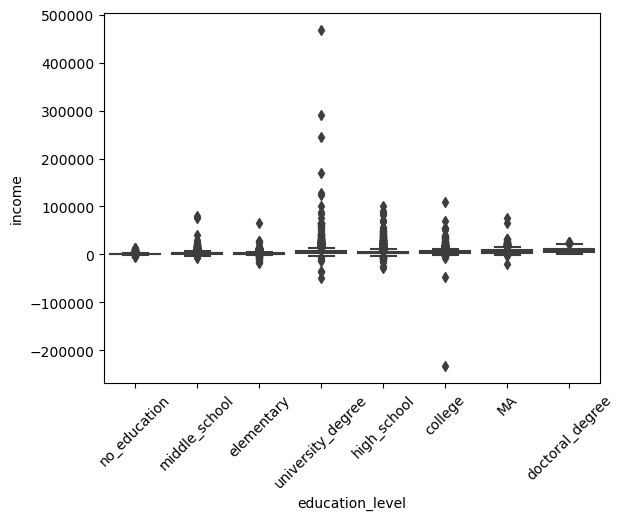

In [67]:
plt.figure()

sns.boxplot(data=df, x="education_level", y='income')
plt.xticks(rotation=45)
plt.show()

In [68]:
df.income.quantile([.002, .998])

0.002      -47.000
0.998    24483.904
Name: income, dtype: float64

In [70]:
df = df[(df['income'] <= 25000) & (df['income'] >= 0)]
df

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,job_title
0,10101,2005,1,Seoul,614.0,1,female,1936,no_education,married,non-religious,20000,,nursing,NaN
1,10101,2011,7,Seoul,896.0,1,female,1936,no_education,married,non-religious,20000,,no_intention_to_work,NaN
2,10101,2012,8,Seoul,1310.0,1,female,1936,no_education,married,non-religious,20000,,no_intention_to_work,NaN
3,10101,2013,9,Seoul,2208.0,1,female,1936,no_education,married,non-religious,20000,,not_capable,NaN
4,10101,2014,10,Seoul,864.0,1,female,1936,no_education,married,non-religious,20000,,no_intention_to_work,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91262,98000701,2014,10,Chong-nam,11600.0,6,male,1967,high_school,NA(Under_18),religious,874,1,employed,Goods movement equipment operator
91263,98000701,2015,11,Chong-nam,8327.0,6,male,1967,high_school,NA(Under_18),religious,874,1,employed,Goods movement equipment operator
91264,98000701,2016,12,Chong-nam,7931.0,6,male,1967,high_school,NA(Under_18),religious,874,1,employed,Goods movement equipment operator
91265,98000701,2017,13,Chong-nam,8802.0,5,male,1967,high_school,NA(Under_18),religious,874,1,employed,Goods movement equipment operator


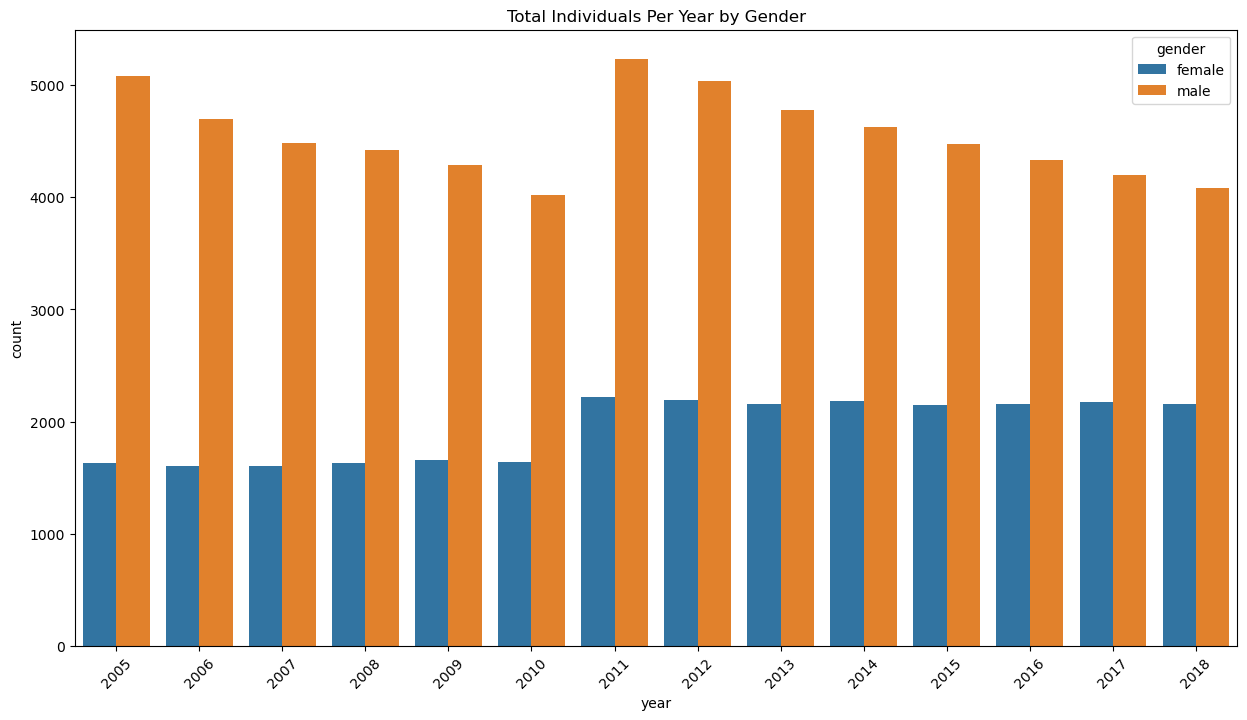

In [72]:
plt.figure(figsize=(15,8))

sns.countplot(data=df, x='year', hue='gender')
plt.title("Total Individuals Per Year by Gender")
plt.xticks(rotation=45)
plt.show()

* 다음으로 2011년 복지조사에서 증가를 야기할 특정 집단이 있는지 알아보기 위해 혼인에 의한 붕괴가 있었는지 알아보고자 하였다. 18세 미만. 출생률이 크게 증가했을 가능성이 있습니다. 그러나 한국에서 출산율이 감소했기 때문에 이러한 추론이 가능하지 않다고 생각합니다.

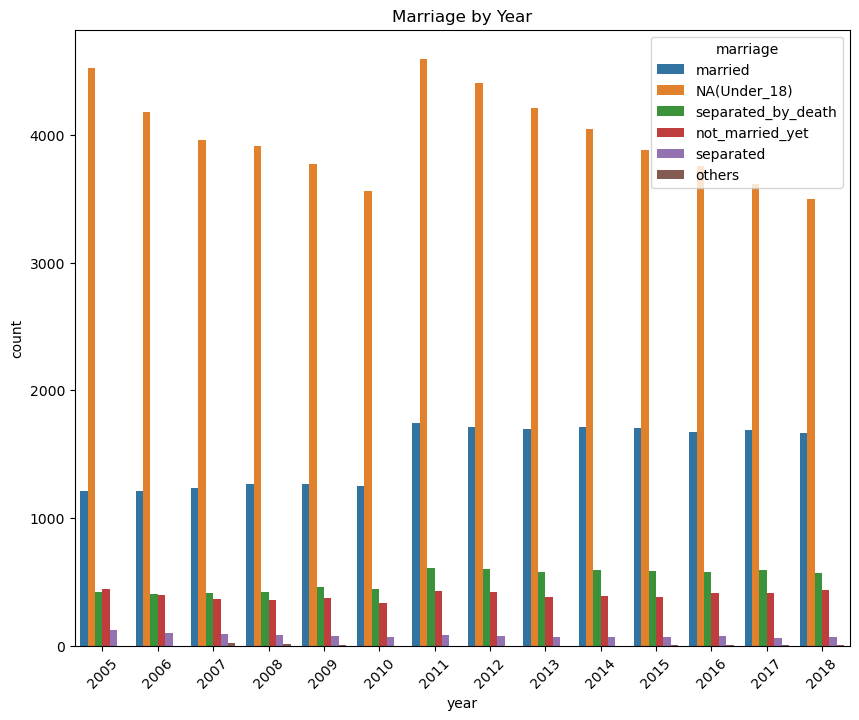

In [75]:
plt.figure(figsize=(10,8))

sns.countplot(data=df, x='year', hue='marriage')
plt.title('Marriage by Year')
plt.xticks(rotation=45)
plt.show()

* 다음 시각화에서는 각 작업 범주(상위 10개)에 포함된 개인의 수를 살펴봅니다. 설문 조사에 따르면 대부분의 사람들이 일하는 범주는 청소부와 자동차 운전사입니다. 이러한 범주의 평균 수입을 보여주는 시각화에서 청소부는 다른 모든 상위 직종 중에서 가장 적은 급여를 받는 것을 볼 수 있습니다.

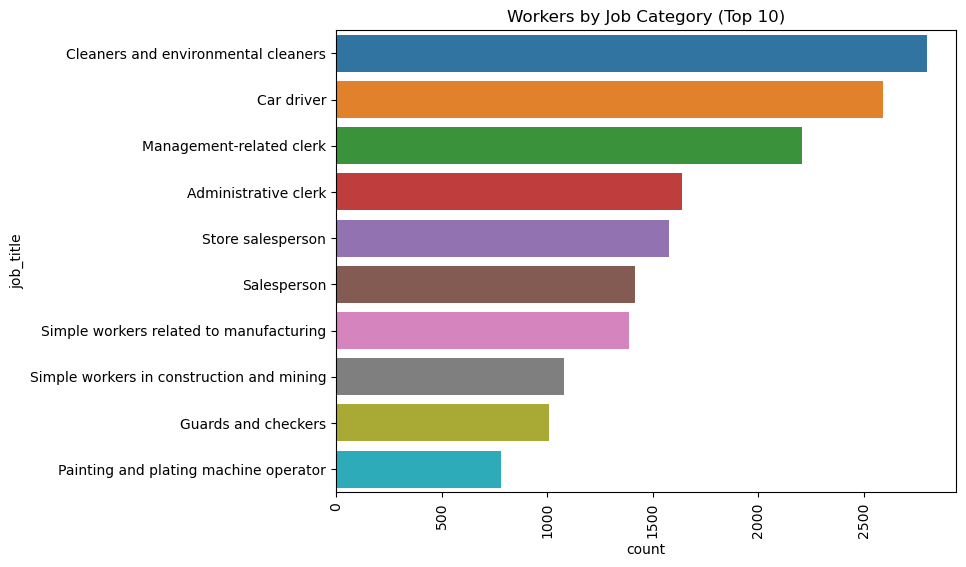

In [77]:
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="job_title", order=df.job_title.value_counts().iloc[1:11].index)
plt.xticks(rotation=90)
plt.title("Workers by Job Category (Top 10)")
plt.show()

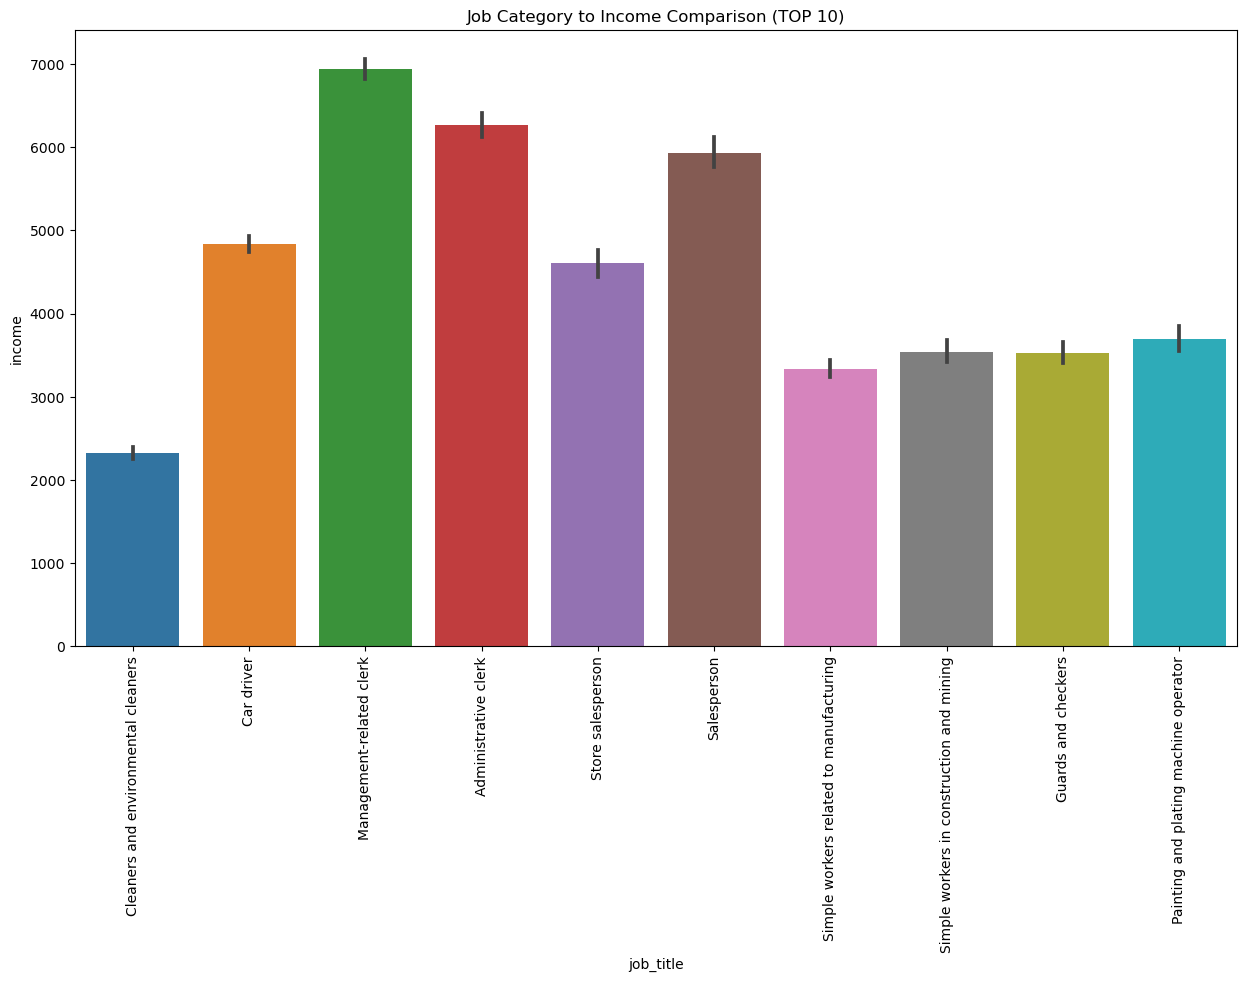

In [87]:
plt.figure(figsize=(15,8))

sns.barplot(data=df, x='job_title', y='income', order=df.job_title.value_counts().iloc[1:11].index)
plt.title("Job Category to Income Comparison (TOP 10)")
plt.xticks(rotation=90)
plt.show()

In [90]:
df['age'] = [y-z for y,z in zip(df['year'], df['year_born'])]
df['age']

0        69
1        75
2        76
3        77
4        78
         ..
91262    47
91263    48
91264    49
91265    50
91266    51
Name: age, Length: 90900, dtype: int64

In [91]:
df = df.drop('year_born', axis=1)
df

,id,year,wave,region,income,family_member,gender,education_level,marriage,religion,occupation,company_size,reason_none_worker,job_title,age
0,10101,2005,1,Seoul,614.0,1,female,no_education,married,non-religious,20000,,nursing,NaN,69
1,10101,2011,7,Seoul,896.0,1,female,no_education,married,non-religious,20000,,no_intention_to_work,NaN,75
2,10101,2012,8,Seoul,1310.0,1,female,no_education,married,non-religious,20000,,no_intention_to_work,NaN,76
3,10101,2013,9,Seoul,2208.0,1,female,no_education,married,non-religious,20000,,not_capable,NaN,77
4,10101,2014,10,Seoul,864.0,1,female,no_education,married,non-religious,20000,,no_intention_to_work,NaN,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91262,98000701,2014,10,Chong-nam,11600.0,6,male,high_school,NA(Under_18),religious,874,1,employed,Goods movement equipment operator,47
91263,98000701,2015,11,Chong-nam,8327.0,6,male,high_school,NA(Under_18),religious,874,1,employed,Goods movement equipment operator,48
91264,98000701,2016,12,Chong-nam,7931.0,6,male,high_school,NA(Under_18),religious,874,1,employed,Goods movement equipment operator,49
91265,98000701,2017,13,Chong-nam,8802.0,5,male,high_school,NA(Under_18),religious,874,1,employed,Goods movement equipment operator,50


/Users/minyoungxi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


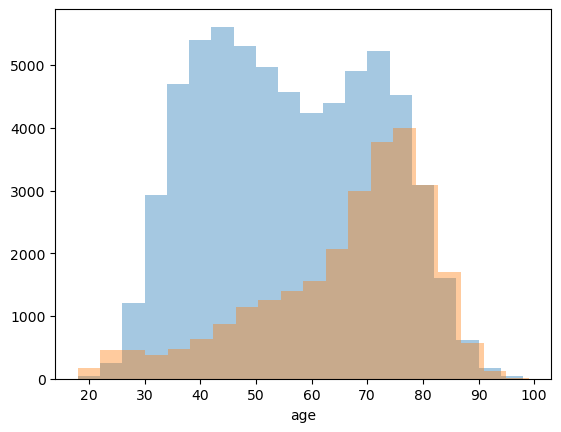

In [93]:
target_0 = df.loc[df['gender'] == 'male']
target_1 = df.loc[df['gender'] == 'female']

sns.distplot(target_0['age'], kde=False, bins =20)
sns.distplot(target_1['age'], kde=False, bins =20)

plt.show()